In [1]:
import numpy as np

from aiida import load_profile

from aiida.engine import WorkChain, calcfunction
from aiida.plugins import DataFactory, WorkflowFactory

from aiida.common.extendeddicts import AttributeDict

from aiida_vasp_ext_mlauer.util.structures import gen_aiida_structure
from aiida_vasp_ext_mlauer.workflows.vol_opt import generate_eos_structures

load_profile('lauerm-test')

Profile<uuid='f4d23725fea446908276e21eedde97d3' name='lauerm-test'>

In [2]:
# Set up structure for testing - hexagonal GaN
a = 3.33
c_over_a = 1.602

lat = np.array([
    [1/2, -np.sqrt(3)/2,         0],
    [1/2,  np.sqrt(3)/2,         0],
    [  0,             0,  c_over_a]
    ])

basis_pos = np.array([
    [1/3, 2/3, 0],
    [2/3, 1/3, 0],
    [1/3, 2/3, 0],
    [2/3, 1/3, 0]
    ])
basis_atm = ["Ga", "Ga", "N", "N"]
basis = (basis_atm, basis_pos)

structure = gen_aiida_structure(a, lat, *basis)


# set up builder.
struc = structure.get_pymatgen()

structure_generation = AttributeDict()
structure_generation.parameters = {'mode': 'uniform'}
structure_generation.max_volume_scaling = 0.1
structure_generation.lattice_points = 11


structure_generation.max_volume_scaling, structure_generation.parameters
structures = (generate_eos_structures(structure, structure_generation))
structure_generation.parameters = {'mode': 'geometric'}
structures_2 = (generate_eos_structures(structure, structure_generation))

[0.9  0.92 0.94 0.96 0.98 1.   1.02 1.04 1.06 1.08 1.1 ]
[0.90909091 0.92658625 0.94441829 0.9625935  0.9811185  1.
 1.01924488 1.03886012 1.05885285 1.07923035 1.1       ]


In [3]:
max_vol_dev = 0.1
half_num_pts = 11 // 2 + 1
vol_devs = np.geomspace(1, 1+max_vol_dev, half_num_pts) # logarithmic spacing for compression (negative values have to be handled separately, as log can't handle them ..)

vol_dev_comp = 1/vol_devs[::-1]
vol_dev_exp = vol_devs

vol_dev_comp, vol_dev_exp
# np.unique(np.concatenate([vol_dev_comp, vol_dev_exp])).size, vol_dev_exp.size +vol_dev_comp.size

(array([0.90909091, 0.92658625, 0.94441829, 0.9625935 , 0.9811185 ,
        1.        ]),
 array([1.        , 1.01924488, 1.03886012, 1.05885285, 1.07923035,
        1.1       ]))

In [ ]:
max_vol_dev = 0.1
delta = 2 * max_vol_dev 
num = 11

y = np.arange(0, num).reshape((-1,) + (1,) * 0)

step = delta / num**1.5

y = y * step 
yb


array([0.        , 0.00548202, 0.01096405, 0.01644607, 0.0219281 ,
       0.02741012, 0.03289215, 0.03837417, 0.0438562 , 0.04933822,
       0.05482024])

In [ ]:
def myspace(start, stop, num, pwr=1):
    
    delta = np.difference([start, stop])
    dev = delta / num

    # linear space from -1 to 1
    points = np.linspace(-1, 1, num)
    print(x)

    # apply power-law
    points = (np.sign(x) * np.abs(x)**pwr) * dev
    print(x_transformed)
    # scale to actual interval


    return x_transformed

myspace(-max_vol_dev, max_vol_dev, 11)

[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
[-0.1        -0.07155418 -0.0464758  -0.02529822 -0.00894427  0.
  0.00894427  0.02529822  0.0464758   0.07155418  0.1       ]


array([-0.1       , -0.07155418, -0.0464758 , -0.02529822, -0.00894427,
        0.        ,  0.00894427,  0.02529822,  0.0464758 ,  0.07155418,
        0.1       ])

[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
[-0.1        -0.07155418 -0.0464758  -0.02529822 -0.00894427  0.
  0.00894427  0.02529822  0.0464758   0.07155418  0.1       ]
[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
[-0.1        -0.07823462 -0.05701201 -0.03649774 -0.0170268   0.
  0.0170268   0.03649774  0.05701201  0.07823462  0.1       ]
[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
[-0.1        -0.0765082  -0.05417283 -0.03330213 -0.01449559  0.
  0.01449559  0.03330213  0.05417283  0.0765082   0.1       ]
[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
[-0.1        -0.07481988 -0.05147503 -0.03038631 -0.01234068  0.
  0.01234068  0.03038631  0.05147503  0.07481988  0.1       ]
[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
[-0.1        -0.07316881 -0.04891159 -0.02772579 -0.01050611  0.
  0.01050611  0.02772579  0.04891159  0.07316881  0.1       ]
[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
[-0.1        -0.0715541

(0.8, 2.2)

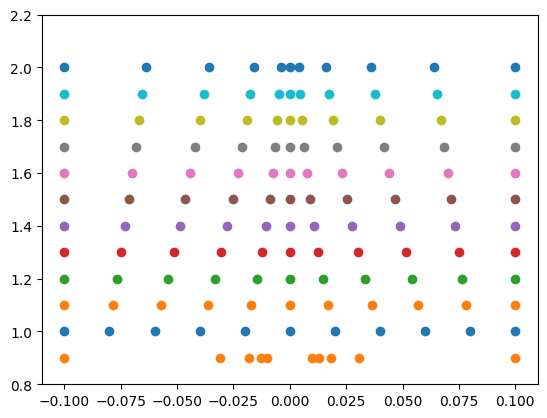

In [64]:
v = structure.get_cell_volume()
num_pts = 11

vol_dev_lin = np.linspace(-max_vol_dev, max_vol_dev, num_pts)
vol_dev_inv = myspace(0, max_vol_dev, num_pts)

volumes_lin = v * vol_dev_lin
volumes_inv = v * vol_dev_inv
idxes = np.ones(shape=(num_pts,))

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(vol_dev_lin, idxes, label='linear spacing')
for pwr in [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]:
    ax.scatter(myspace(0, max_vol_dev, num_pts, pwr=pwr), idxes*pwr, label='linear spacing')

dev = 1 / np.linspace(1/max_vol_dev, 100, int(num_pts/2))
dev_2 = np.unique(np.concatenate([-dev[::-1], dev]))
ax.scatter(dev_2, [0.9 for i in dev_2], label='inverse spacing')

ax.set_ylim(0.8, 2.2)